### 7 pandas基础知识

#### 学习第三方库的基本方法：<br>
官方文档：https://pandas.pydata.org/docs/user_guide/10min.html<br>
搜索引擎<br>
AI模型<br>

Pandas 是一个用于数据分析和处理的 Python 库，提供了高效的数据结构和操作工具。它主要通过 DataFrame 和 Series 两种数据结构来处理表格型数据和一维数据，支持数据清洗、合并、分组、过滤、以及时间序列处理等功能。Pandas 以其简洁的 API 和强大的功能，广泛应用于数据科学、金融分析和统计等领域。

在训练神经网络模型时，需要处理大量的数据，pandas可以帮助我们高效地进行数据的加载、预处理和管理。通过pandas，我们可以轻松读取多种格式的数据文件（如CSV、Excel等），并且可以对数据进行清洗、转换和筛选。这对于确保输入神经网络的数据格式正确、无缺失或异常值非常关键。此外，pandas还支持强大的数据操作功能，如分组聚合、合并数据集和生成统计信息，从而使我们能够在模型训练前对数据进行充分的探索与处理，提高模型的准确性和效率。

open-images-bus-trucks数据集包含15225张图片：<br>
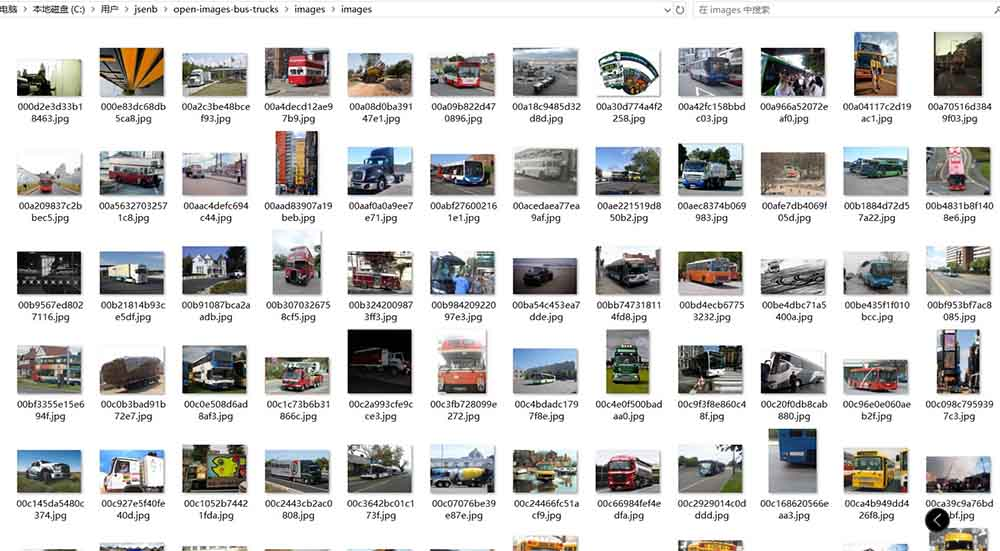

图片中共包含24063个对象：<br>
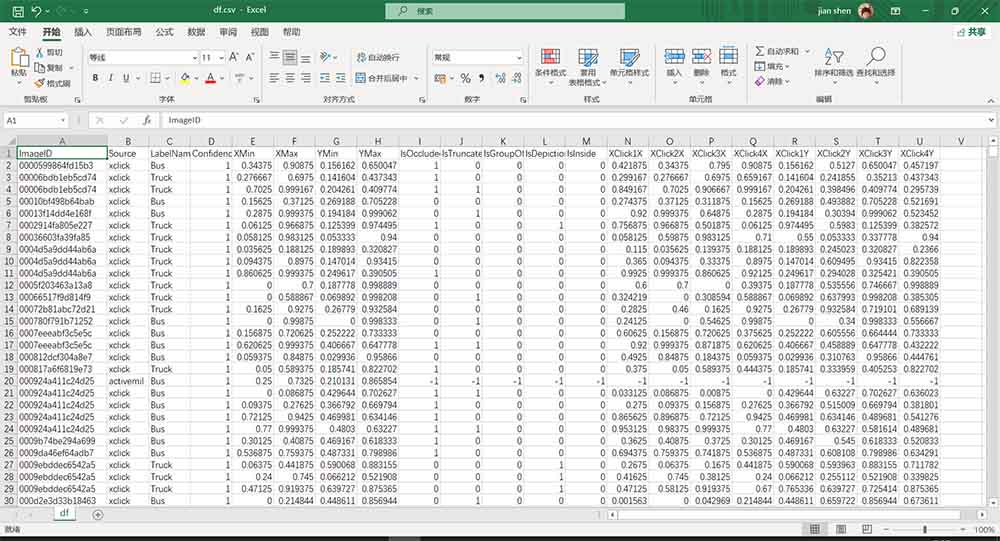

1. 标注的图片如图所示：<br>
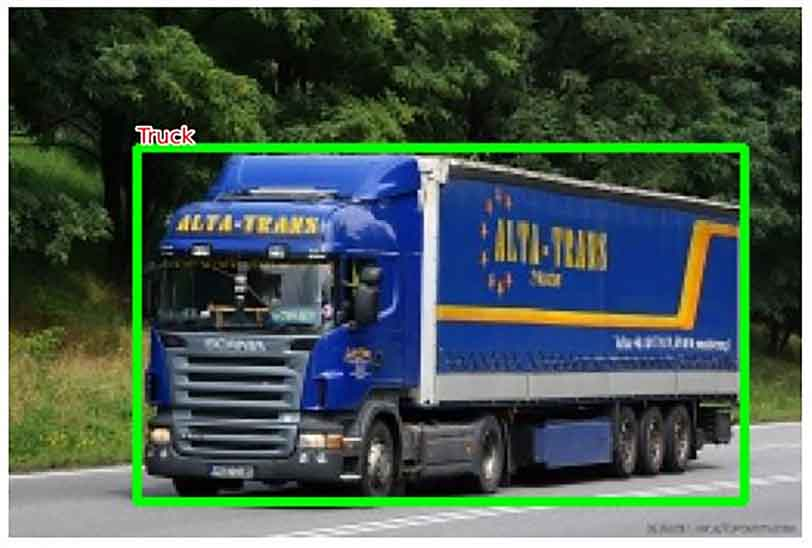

#### 如何获取用于学习的数据集：<br>
1、kaggle网站上有超过40万个数据集，涵盖计算机视觉、数据可视化、商业数据、机器学习、金融数据、医疗数据等诸多领域。<br>
2、可以使用Python编写爬虫程序，爬取数据<br>
3、问问kimi：我想学习数据分析，我可以通过哪些途径获取用于学习的数据？<br>

kaggle注册以及使用教程：https://cv.kedaya.online/article/kaggle-tutorials/

本教程参考链接：https://pandas.pydata.org/docs/user_guide/10min.html#basic-data-structures-in-pandas

#### 7.1 pandas的基本数据结构<br>
pandas提供两个类来处理数据：<br>
Series：一维标签数组，用于存储任何类型的数据，如整数、字符串、Python对象等。<br>
DataFrame：二维数据结构，存储数据类似于二维数组或带有行和列的表格。<br>

#### 7.2 创建pandas对象

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#### 7.2.1 创建：Series<br>
通过传递一个序列对象来创建一个Series，pandas会创建一个默认的RangeIndex索引。

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

#### 7.2.2 创建DataFrame<br>
通过传递一个带有datetime索引的NumPy数组并使用date_range()以及标记列来创建一个DataFrame。<br>
注：datetime是Python中用于处理日期和时间的模块，它提供了日期、时间、时区和时差的类和函数。

In [ ]:
#创建datetime数组
dates = pd.date_range("20130101", periods=6)
dates

In [ ]:
#随机产生6行4列数据，以datetime数组为索引，以['A', 'B', 'C', 'D']为列标记
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))
df

通过传入字典对象创建DataFrame，字典的键即为DataFrame的列标记，字典的值则为DataFrame的值。

In [ ]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2

DataFrame中的列为不同的数据类型（dtypes）。

In [ ]:
df2.dtypes

复习：dir()与help()函数<br>
DataFrame有很多的属性和方法，如果不记得一个对象所包含的方法，可以使用dir()函数来查看，<br>
如果不记得方法的调用方法，可以使用help()函数查看。<br>

In [ ]:
#使用dir()函数查看对象的属性与方法，其中也双下划线开头的为特殊方法，通常无需直接调用，而是由Python解释器调用，以单下划线开头的是私有方法
dir(df2)

In [ ]:
#使用help()函数查看方法的调用方法
help(df2.to_csv)

### 7.3 查看数据

#### 7.3.1 使用 DataFrame.head() 和 DataFrame.tail() 查看前n行和后n行的数据。

In [ ]:
#查看前5行的数据
df.head(5)

In [ ]:
#查看后5行的数据
df.tail(5)

#### 7.3.2 查看索引和列标记

In [ ]:
df.index

In [ ]:
df.columns

#### 7.3.3 将DataFrame对象转化为NumPy对象，但不包括索引或列标记。

In [ ]:
df.to_numpy()

#### 7.3.4 使用describe()查看数据的快速统计摘要

In [ ]:
df.describe()

#### 7.3.5 将数据行列转置

In [ ]:
df.T

#### 7.3.6 将数据按轴排序

In [ ]:
df.sort_index(axis=1, ascending=False)

#### 7.3.7 将数据按值排序

In [ ]:
df.sort_values(by="B")

### 7.4 选择数据

#### 7.4.1 选择A列数据，传入要选择的列标记，会返回一个Series对象。

In [ ]:
df["A"]  #等效df.A

#### 7.4.2 按标签选择数据

In [ ]:
df.loc[dates[0]]

选择所有行的"A"和"B"列数据

In [ ]:
#与列表类型的切片相似如果起始值缺失则从第一个元素开始，结尾值缺失则到最后一个元素。
df.loc[:, ["A", "B"]]

选择行索引为"20130102":"20130104",列标记为"A", "B"的数据

In [ ]:
df.loc["20130102":"20130104", ["A", "B"]]

选择单个行和列标签将返回一个标量值

In [ ]:
df.loc[dates[0], "A"]

#### 7.4.3 通过位置来获取值

In [ ]:
df.iloc[3]

使用切片来获取数据，与Python中的切片类似

In [ ]:
df.iloc[3:5, 0:2]

使用整数索引来获取值

In [ ]:
df.iloc[[1, 2, 4], [0, 2]]

使用切片获取数据

In [ ]:
df.iloc[:, 1:3]

获取第n行第n列的元素

In [ ]:
df.iloc[1, 1]

#### 7.4.4 布尔索引

选择第A列的值大于0的行

In [ ]:
df[df["A"] > 0]

选择满足条件的DataFrame中的值

In [ ]:
df[df > 0]

使用isin() 方法来过滤值

In [ ]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
print(df2)
df2[df2["E"].isin(["two", "four"])]

#### 7.4.5 设置DataFrame的值

设置一个新列会自动根据索引对齐数据

In [ ]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1

In [ ]:
df

In [ ]:
df["F"] = s1   #s1的索引变为了原DataFrame的索引
df

按标签设置元素的值

In [ ]:
df.at[dates[0], "A"] = 0  #第0索引，A列的值修改为0
df

按位置设置元素的值

In [ ]:
df.iat[0, 1] = 0  #第1行第2列的值修改为0
df

使用NumPy数值修改DataFrame的值

In [ ]:
df.loc[:, "D"] = np.array([5] * len(df))
df

使用where操作来设置元素的值

In [ ]:
df2 = df.copy()
df2[df2 > 0] = -df2   #where df2 > 0的元素，将其值修改对对应的df2元素的负值
df2

### 7.5 处理缺失值

#### 7.5.1 重新索引（Reindexing）应许你针对特定的轴修改/增加/删除索引值，并返回一个数据的副本。

In [ ]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])    #使用第1到第4行的值重新索引，并增加E列
df1.loc[dates[0] : dates[1], "E"] = 1                                   #第1第2行，E列的值修改为1
df1

#### 7.5.2 使用DataFrame.dropna()方法丢弃缺失值

In [ ]:
df1.dropna(how="any")     #不会直接修改原DataFrame，而是返回一个新的DataFrame对象

#### 7.5.3 使用DataFrame.fillna()填充缺失值

In [ ]:
df1.fillna(value=5)

#### 7.5.4 使用isna()查看缺失值

In [ ]:
pd.isna(df1)

### 7.6 DataFrame的操作

#### 7.6.1 统计操作

计算每列的平均值

In [ ]:
df.mean()

计算每行的平均值

In [ ]:
df.mean(axis=1)

关于DataFrame中的轴

In [ ]:
A = [
      [1,2],
      [3,4],
      [5,6],
      [7,8],
    ]
d = pd.DataFrame(A)
d

shift()将Series中的值沿着索引轴进行位移。数字2表示向右移动2个位置。位移操作会将原来的值向下移动2个位置，顶部的2个位置将被填充为NaN（即np.nan）。

In [ ]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)   #创建[1,3,5,NaN,6,8]Series对象，然后
s

sub(s): 这是DataFrame的减法方法。它将Series中的值从DataFrame中逐个元素减去。

In [ ]:
df

In [ ]:
df.sub(s, axis="index")   #沿着水平轴（行）的方向，Series的索引将与DataFrame的列标签进行对齐，然后逐个元素相减。

#### 7.6.2 用户定义函数

In [ ]:
df.transform(lambda x: x * 101.2)   #类似于excel中的数组函数，将函数应用于每个元素

#### 7.6.3 计算Series中每个唯一值出现的频率

In [ ]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

#### 7.6.4 拆分DataFrame

In [ ]:
df = pd.DataFrame(np.random.randn(10, 4))
print(df)
pieces = [df[:3], df[3:7], df[7:]]
pieces[0]

### 7.7 分组

分组（grouping）是指根据某些标准将数据分割成组，对每个组分别应用函数，然后将结果合并成数据结构的过程。

In [ ]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
df

In [ ]:
df.groupby("A")[["C", "D"]].sum()   #按A列进行分组，然后按组对C、D列求和

### 7.8 DataFrame的形状操作

#### 7.8.1 堆叠（stack）：数据的堆叠操作，用于将DataFrame的列旋转为行。

In [ ]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]

index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])   #建立两个索引

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[0:4]

df2

In [ ]:
stacked = df2.stack(future_stack=True)   #future_stack=True保存与新版本的兼容性
stacked

反堆叠（unstack）：用于将多级索引的Series转换回DataFrame。

In [ ]:
stacked.unstack()

In [ ]:
stacked.unstack(1)

In [ ]:
stacked.unstack(0)

#### 7.8.2 数据透视（Pivot tables）

In [ ]:
df = pd.DataFrame(
    {
        "姓名": ["可达鸭", "杰尼龟", "比卡丘", "妙蛙种子"] * 3,
        "商品": ["薯条", "汉堡", "可乐","麦辣鸡翅","汉堡", "可乐"] * 2,
        "单价": [10, 15, 5, 12] * 3,
        "数量": np.random.randint(10, 21, size=12),
    }
)
df['金额'] = df['单价'] * df['数量']

df

In [ ]:
pd.pivot_table(df, values="金额", index=["姓名"], columns=["商品"],aggfunc=["sum", "mean"])

### 7.9 DataFrame练习

使用爬虫爬取"咖啡"销售数据，然后使用pandas进行分析。<br>
爬虫程序地址：https://cv.kedaya.online/article/python-web-crawler-example-taoke-data-scraping/

In [ ]:
!pip install requests   #安装requests库
import os
import json
import re
import csv
from datetime import datetime
import requests


def getdata(kw):
    """kw为要爬取的商品名"""
    items = []
    i = 1
    #爬取数据
    while True:
        url = "http://dtkapi.ffquan.cn/go_getway/proxy/search?platform=1&page={}&sortType=4&kw={}&api_v=1".format(i,str(kw))
        r = requests.get(url)
        html = r.text
        data = json.loads(html)
        if  data['data']['search']['list']:
            for good in data['data']['search']['list']:
                item = {}
                title = good["d_title"]
                gg = re.findall(r"[1-9]\d*",title)
                if len(gg) == 2:
                    if float(gg[0]) > float(gg[1]):
                        gg[0],gg[1] = gg[1],gg[0]
                count = 0
                if len(gg) != 0:
                    count = gg[0]
                item = {'品牌':good["brand_name"],'标题':good["d_title"],'链接':good["item_link"],'原价':good["original_price"],'优惠券':good["coupon_amount"],'优惠券链接':good["coupon_link"],'券后价':good["price"],'佣金比例':good["commission_rate"],'佣金':good["direct_commission"],'2小时销量':good["sales_2h"],'日销量':good["sales_daily"],'总销量':good["sales"],'count':count}
                items.append(item)
            i += 1
            continue
        else:
            break
    #如果爬取到数据，在将数据保存为csv文件
    if items:
        t = datetime.now().strftime("%Y%m%d%H%M%S")
        filename = f'data{t}.csv'
        with open(filename, 'w', encoding='utf-8-sig', newline='') as csvfile:
            fieldnames = items[0].keys()
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            for data in items:
                writer.writerow(data)
        c = len(items)
        current_path = os.getcwd()
        print(f"成功爬取{c}条数据，文件{filename}，保存在{current_path}目录。")

if __name__ == "__main__":
    r = getdata("咖啡")


In [ ]:
#首先安装pandas库，在命令行输入：pip install pandas
#导入pandas
import pandas as pd
#读取csv文件,将文件名修改为你的文件名
df = pd.read_csv("/kaggle/working/data20241024035055.csv")

In [ ]:
pd.set_option('display.max_rows', None)  # 设置显示所有行
pd.set_option('display.max_columns', None)  # 设置显示所有列
pd.set_option('display.width', None)  # 设置显示宽度，None表示根据内容自动调整

#### 练习1：处理异常值，将“品牌”列中缺失的数据填充为“其他”<br>
提示：使用fillna()方法，参考7.5.3

In [ ]:
#答案
df1 = df.fillna(value='其他')
print(df1)

#### 练习2：将数据按照“总销量”排序<br>
提示：使用df.sort_values()方法，参考7.3.7

In [ ]:
#答案
df2 = df.sort_values(by='总销量', ascending=False)
print(df2)

#### 练习3：选取“总销量”大于10000的商品<br>
提示：参考7.4.4布尔索引

In [ ]:
#答案
df3 = df[df["总销量"] > 10000]
print(df3)

#### 练习4：计算售价的平均数，中位数<br>
提示：<br>
1、使用df['券后价']将“券后价”列转Seriese，参考7.4.1<br>
2、然后使用.mean()，.median()方法计算平均数和中位数，参考7.6.1统计操作

In [ ]:
average_price = df['券后价'].dropna().mean()
median_price = df['券后价'].dropna().median()
print(median_price,average_price)

#### 练习5：统计品牌上榜次数<br>
提示：<br>
1、使用df['品牌']将“品牌”列转化为Series，参考7.4.1<br>
2、然后使用value_counts()方法，计算Series中每个唯一值出现的次数，参考7.6.3<br>

In [ ]:
#答案
series_a = df['品牌']
print(series_a.value_counts())

#### 练习6：查看“雀巢”，“瑞幸咖啡”，“g 7 coffee”三个品牌的销售数据<br>
提示：使用isin()方法，参考7.4.4布尔布索引

In [ ]:
#答案
df6 = df[df['品牌'].isin(['雀巢','瑞幸咖啡','g 7 coffee'])]
print(df6.head(20))